## Group Project: What Genre is It?

## Introduction

The exact definition for a music genre is sometimes difficult to judge, and people tend to classify songs based on 'feel' and loose characteristics. What if there was a more concrete and systematic way to complete this classification? This project aims to produce a model that can, given a song's numeric characteristics, predict its genre. We are using an open-source dataset on Kaggle which contains information on various song characteristics such as duration, dancability, popularity, and acousticness. The dataset was last updated in December of 2021.

Question: How are the numerical characteristics of a song related to its genre?

## Preliminary exploratory data analysis

In [5]:
### Loading Libraries into R
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [6]:
### data is read from online
data <- read_csv(file = "data/music_genre.csv")
data

Parsed with column specification:
cols(
  instance_id = col_double(),
  artist_name = col_character(),
  track_name = col_character(),
  popularity = col_double(),
  acousticness = col_double(),
  danceability = col_double(),
  duration_ms = col_double(),
  energy = col_double(),
  instrumentalness = col_double(),
  key = col_character(),
  liveness = col_double(),
  loudness = col_double(),
  mode = col_character(),
  speechiness = col_double(),
  tempo = col_character(),
  obtained_date = col_character(),
  valence = col_double(),
  music_genre = col_character()
)



instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
32894,Röyksopp,Röyksopp's Night Out,27,0.00468,0.652,-1,0.941,0.7920,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
46652,Thievery Corporation,The Shining Path,31,0.01270,0.622,218293,0.890,0.9500,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
30097,Dillon Francis,Hurricane,28,0.00306,0.620,215613,0.755,0.0118,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
39767,Berner,Lovin' Me (feat. Smiggz),51,0.00597,0.693,189483,0.763,0,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
57944,The-Dream,Shawty Is Da Shit,65,0.08310,0.782,262773,0.472,0,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop
63470,Naughty By Nature,Hip Hop Hooray,67,0.10200,0.862,267267,0.642,0,F#,0.272,-13.652,Minor,0.1010,99.20100000000001,4-Apr,0.765,Hip-Hop


### Variable Explanations:

`artist_name`: The artist that released the song

`track_name`: Name of the track released

`popularity`: A 0 to 100 score that ranks how popular an artist is relative to other artists on Spotify

`acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 very confident the track is acoustic.

`danceability`: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A scale from 0.0 (least danceable) to 1.0 (most danceable). 

`duration_ms`: The duration of the track in milliseconds.

`energy`: A measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

`instrumentalness`: Predicts whether a track contains no vocals. A scale from 0.0 to 1.0, the closer to 1.0 the greater likelihood the track contains no vocal content.

`liveness`: Detects the presence of an audience in the recording. A scale from 0.0 to 1.0, the closer to 1.0 the more likelihood of the track was performed live.

`loudness`: The overall loudness of a track in decibels (dB),values are the averaged across the track. A scale of -60.0 to 0.0.

`mode`: Is the track in Major or Minor.

`speechiness`: Detects the presence of spoken words in a track. A scale from 0.0 to 1.0, the closer to 1.0 the more likelihood of being an exclusively speech-like recording.

`tempo`: The overall estimated tempo of a track in beats per minute (BPM).

`valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more happy, whereas tracks with low valence sound more sad.

`music_genre`: What the genre of the track is.

This dataset is already tidy, for which each variable had it's own column. Each observation is in it's own row, each cell has exactly one data point.

### Excluded Variables:

`instance_id`: 

`key`: We felt that the key of the track will not be a variable that we will need in determining the genre of the track.

`obtained_date`: We do not need the date that this track was obtained from the internet.

In [32]:
### removing the columns we don't need
data_select <- data %>%
            select(-instance_id, -key,-obtained_date)
data_factor <- mutate(data_select,
                  mode = as.factor(mode),
                  music_genre = as.factor(music_genre),
                  tempo = as.double(tempo))
data_factor

Warning message:
“Problem with `mutate()` input `tempo`.
ℹ NAs introduced by coercion
ℹ Input `tempo` is `as.double(tempo)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,music_genre
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
Röyksopp,Röyksopp's Night Out,27,0.00468,0.652,-1,0.941,0.7920,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
Thievery Corporation,The Shining Path,31,0.01270,0.622,218293,0.890,0.9500,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
Dillon Francis,Hurricane,28,0.00306,0.620,215613,0.755,0.0118,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Berner,Lovin' Me (feat. Smiggz),51,0.00597,0.693,189483,0.763,0,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
The-Dream,Shawty Is Da Shit,65,0.08310,0.782,262773,0.472,0,0.106,-5.016,Minor,0.0441,75.886,0.354,Hip-Hop
Naughty By Nature,Hip Hop Hooray,67,0.10200,0.862,267267,0.642,0,0.272,-13.652,Minor,0.1010,99.201,0.765,Hip-Hop


In [37]:
### spliting the data into training set and testing set, 75% of the data in the training set
data_split <- initial_split(data_factor, prop = 0.75, strata = music_genre) 
data_train <- training(data_split)   
data_test <- testing(data_split)
data_train
data_test

Warning message:
“Too little data to stratify. Unstratified resampling will be used.”


artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,music_genre
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
Röyksopp,Röyksopp's Night Out,27,0.00468,0.652,-1,0.941,7.92e-01,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
Thievery Corporation,The Shining Path,31,0.01270,0.622,218293,0.890,9.50e-01,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
Jordan Comolli,Clash,46,0.02890,0.572,214408,0.803,7.74e-06,0.106,-4.294,Major,0.3510,149.995,0.230,Electronic
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Berner,Lovin' Me (feat. Smiggz),51,0.00597,0.693,189483,0.763,0,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
The-Dream,Shawty Is Da Shit,65,0.08310,0.782,262773,0.472,0,0.106,-5.016,Minor,0.0441,75.886,0.354,Hip-Hop
Naughty By Nature,Hip Hop Hooray,67,0.10200,0.862,267267,0.642,0,0.272,-13.652,Minor,0.1010,99.201,0.765,Hip-Hop


artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,music_genre
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
Dillon Francis,Hurricane,28,0.00306,0.620,215613,0.755,0.01180,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
Dubloadz,Nitro,34,0.02540,0.774,166875,0.700,0.00253,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
What So Not,Divide & Conquer,32,0.00465,0.638,222369,0.587,0.90900,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Lecrae,Cry For You,54,0.304000,0.642,263467,0.353,0.00e+00,0.0927,-12.384,Minor,0.215,89.596,0.276,Hip-Hop
Too $hort,Shake That Monkey,55,0.000577,0.937,278707,0.695,3.19e-05,0.2950,-6.932,Major,0.134,99.997,0.457,Hip-Hop
Roy Woods,Drama (feat. Drake),72,0.157000,0.709,251860,0.362,0.00e+00,0.1090,-9.814,Major,0.055,122.043,0.113,Hip-Hop


In [48]:
### Table for each Genre
Electronic <- data_train %>%
                filter(music_genre == "Electronic") %>%
                group_by(music_genre) %>%
                summarize(Electronic_popularity = mean(popularity, na.ra = True),
                         Electronic_acousticness = mean(acousticness, na.ra = True),
                         Electronic_danceability = mean(danceability, na.ra = True),
                         Electronic_duration_ms = mean(duration_ms, na.ra = True),
                         Electronic_energy = mean(energy, na.ra = True),
                         Electronic_instrumentalness = mean(instrumentalness, na.ra = True),
                         Electronic_liveness = mean(liveness, na.ra = True),
                         Electronic_loudness = mean(loudness, na.ra = True),
                         Electronic_speechiness = mean(speechiness, na.ra = True),
                         Electronic_tempo = mean(tempo, na.ra = True),
                         Electronic_valence = mean(valence, na.ra = True))
Electronic

Anime <- data_train %>%
                filter(music_genre == "Anime") %>%
                group_by(music_genre) %>%
                summarize(Anime_popularity = mean(popularity, na.ra = True),
                         Anime_acousticness = mean(acousticness, na.ra = True),
                         Anime_danceability = mean(danceability, na.ra = True),
                         Anime_duration_ms = mean(duration_ms, na.ra = True),
                         Anime_energy = mean(energy, na.ra = True),
                         Anime_instrumentalness = mean(instrumentalness, na.ra = True),
                         Anime_liveness = mean(liveness, na.ra = True),
                         Anime_loudness = mean(loudness, na.ra = True),
                         Anime_speechiness = mean(speechiness, na.ra = True),
                         Anime_tempo = mean(tempo, na.ra = True),
                         Anime_valence = mean(valence, na.ra = True))
Anime

Jazz <- data_train %>%
                filter(music_genre == "Jazz") %>%
                group_by(music_genre) %>%
                summarize(Jazz_popularity = mean(popularity, na.ra = True),
                         Jazz_acousticness = mean(acousticness, na.ra = True),
                         Jazz_danceability = mean(danceability, na.ra = True),
                         Jazz_duration_ms = mean(duration_ms, na.ra = True),
                         Jazz_energy = mean(energy, na.ra = True),
                         Jazz_instrumentalness = mean(instrumentalness, na.ra = True),
                         Jazz_liveness = mean(liveness, na.ra = True),
                         Jazz_loudness = mean(loudness, na.ra = True),
                         Jazz_speechiness = mean(speechiness, na.ra = True),
                         Jazz_tempo = mean(tempo, na.ra = True),
                         Jazz_valence = mean(valence, na.ra = True))
Jazz

Alternative <- data_train %>%
                filter(music_genre == "Alternative") %>%
                group_by(music_genre) %>%
                summarize(Alternative_popularity = mean(popularity, na.ra = True),
                         Alternative_acousticness = mean(acousticness, na.ra = True),
                         Alternative_danceability = mean(danceability, na.ra = True),
                         Alternative_duration_ms = mean(duration_ms, na.ra = True),
                         Alternative_energy = mean(energy, na.ra = True),
                         Alternative_instrumentalness = mean(instrumentalness, na.ra = True),
                         Alternative_liveness = mean(liveness, na.ra = True),
                         Alternative_loudness = mean(loudness, na.ra = True),
                         Alternative_speechiness = mean(speechiness, na.ra = True),
                         Alternative_tempo = mean(tempo, na.ra = True),
                         Alternative_valence = mean(valence, na.ra = True))
Alternative

Country <- data_train %>%
                filter(music_genre == "Country") %>%
                group_by(music_genre) %>%
                summarize(Country_popularity = mean(popularity, na.ra = True),
                         Country_acousticness = mean(acousticness, na.ra = True),
                         Country_danceability = mean(danceability, na.ra = True),
                         Country_duration_ms = mean(duration_ms, na.ra = True),
                         Country_energy = mean(energy, na.ra = True),
                         Country_instrumentalness = mean(instrumentalness, na.ra = True),
                         Country_liveness = mean(liveness, na.ra = True),
                         Country_loudness = mean(loudness, na.ra = True),
                         Country_speechiness = mean(speechiness, na.ra = True),
                         Country_tempo = mean(tempo, na.ra = True),
                         Country_valence = mean(valence, na.ra = True))
Country

Rap <- data_train %>%
                filter(music_genre == "Rap") %>%
                group_by(music_genre) %>%
                summarize(Rap_popularity = mean(popularity, na.ra = True),
                         Rap_acousticness = mean(acousticness, na.ra = True),
                         Rap_danceability = mean(danceability, na.ra = True),
                         Rap_duration_ms = mean(duration_ms, na.ra = True),
                         Rap_energy = mean(energy, na.ra = True),
                         Rap_instrumentalness = mean(instrumentalness, na.ra = True),
                         Rap_liveness = mean(liveness, na.ra = True),
                         Rap_loudness = mean(loudness, na.ra = True),
                         Rap_speechiness = mean(speechiness, na.ra = True),
                         Rap_tempo = mean(tempo, na.ra = True),
                         Rap_valence = mean(valence, na.ra = True))
Rap

Blues <- data_train %>%
                filter(music_genre == "Blues") %>%
                group_by(music_genre) %>%
                summarize(Blues_popularity = mean(popularity, na.ra = True),
                         Blues_acousticness = mean(acousticness, na.ra = True),
                         Blues_danceability = mean(danceability, na.ra = True),
                         Blues_duration_ms = mean(duration_ms, na.ra = True),
                         Blues_energy = mean(energy, na.ra = True),
                         Blues_instrumentalness = mean(instrumentalness, na.ra = True),
                         Blues_liveness = mean(liveness, na.ra = True),
                         Blues_loudness = mean(loudness, na.ra = True),
                         Blues_speechiness = mean(speechiness, na.ra = True),
                         Blues_tempo = mean(tempo, na.ra = True),
                         Blues_valence = mean(valence, na.ra = True))
Blues

Rock <- data_train %>%
                filter(music_genre == "Rock") %>%
                group_by(music_genre) %>%
                summarize(Rock_popularity = mean(popularity, na.ra = True),
                         Rock_acousticness = mean(acousticness, na.ra = True),
                         Rock_danceability = mean(danceability, na.ra = True),
                         Rock_duration_ms = mean(duration_ms, na.ra = True),
                         Rock_energy = mean(energy, na.ra = True),
                         Rock_instrumentalness = mean(instrumentalness, na.ra = True),
                         Rock_liveness = mean(liveness, na.ra = True),
                         Rock_loudness = mean(loudness, na.ra = True),
                         Rock_speechiness = mean(speechiness, na.ra = True),
                         Rock_tempo = mean(tempo, na.ra = True),
                         Rock_valence = mean(valence, na.ra = True))
Rock

Classical <- data_train %>%
                filter(music_genre == "Classical") %>%
                group_by(music_genre) %>%
                summarize(Classical_popularity = mean(popularity, na.ra = True),
                         Classical_acousticness = mean(acousticness, na.ra = True),
                         Classical_danceability = mean(danceability, na.ra = True),
                         Classical_duration_ms = mean(duration_ms, na.ra = True),
                         Classical_energy = mean(energy, na.ra = True),
                         Classical_instrumentalness = mean(instrumentalness, na.ra = True),
                         Classical_liveness = mean(liveness, na.ra = True),
                         Classical_loudness = mean(loudness, na.ra = True),
                         Classical_speechiness = mean(speechiness, na.ra = True),
                         Classical_tempo = mean(tempo, na.ra = True),
                         Classical_valence = mean(valence, na.ra = True))
Classical

Hip_Hop <- data_train %>%
                filter(music_genre == "Hip-Hop") %>%
                group_by(music_genre) %>%
                summarize(Hip_Hop_popularity = mean(popularity, na.ra = True),
                         Hip_Hop_acousticness = mean(acousticness, na.ra = True),
                         Hip_Hop_danceability = mean(danceability, na.ra = True),
                         Hip_Hop_duration_ms = mean(duration_ms, na.ra = True),
                         Hip_Hop_energy = mean(energy, na.ra = True),
                         Hip_Hop_instrumentalness = mean(instrumentalness, na.ra = True),
                         Hip_Hop_liveness = mean(liveness, na.ra = True),
                         Hip_Hop_loudness = mean(loudness, na.ra = True),
                         Hip_Hop_speechiness = mean(speechiness, na.ra = True),
                         Hip_Hop_tempo = mean(tempo, na.ra = True),
                         Hip_Hop_valence = mean(valence, na.ra = True))
Hip_Hop

`summarise()` ungrouping output (override with `.groups` argument)



music_genre,Electronic_popularity,Electronic_acousticness,Electronic_danceability,Electronic_duration_ms,Electronic_energy,Electronic_instrumentalness,Electronic_liveness,Electronic_loudness,Electronic_speechiness,Electronic_tempo,Electronic_valence
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Electronic,38.08295,0.121378,0.6182137,244738.6,0.7398241,0.3485918,0.2107914,-7.049242,0.09899785,NA,0.390651


`summarise()` ungrouping output (override with `.groups` argument)



music_genre,Anime_popularity,Anime_acousticness,Anime_danceability,Anime_duration_ms,Anime_energy,Anime_instrumentalness,Anime_liveness,Anime_loudness,Anime_speechiness,Anime_tempo,Anime_valence
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anime,24.15729,0.2853975,0.4709345,209977.6,0.6654802,0.2741458,0.1951638,-7.946649,0.06422653,NA,0.4374744


`summarise()` ungrouping output (override with `.groups` argument)



music_genre,Jazz_popularity,Jazz_acousticness,Jazz_danceability,Jazz_duration_ms,Jazz_energy,Jazz_instrumentalness,Jazz_liveness,Jazz_loudness,Jazz_speechiness,Jazz_tempo,Jazz_valence
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Jazz,40.95294,0.495545,0.5837738,237934.3,0.4723973,0.3480427,0.172082,-11.24564,0.07377369,NA,0.5074201


`summarise()` ungrouping output (override with `.groups` argument)



music_genre,Alternative_popularity,Alternative_acousticness,Alternative_danceability,Alternative_duration_ms,Alternative_energy,Alternative_instrumentalness,Alternative_liveness,Alternative_loudness,Alternative_speechiness,Alternative_tempo,Alternative_valence
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alternative,50.25433,0.1607216,0.5421816,211820.8,0.7137631,0.06307021,0.1960116,-6.510332,0.08862845,NA,0.4504663


`summarise()` ungrouping output (override with `.groups` argument)



music_genre,Country_popularity,Country_acousticness,Country_danceability,Country_duration_ms,Country_energy,Country_instrumentalness,Country_liveness,Country_loudness,Country_speechiness,Country_tempo,Country_valence
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Country,46.04132,0.2668198,0.5767985,195103.9,0.6392752,0.004231971,0.185908,-7.307585,0.04842498,NA,0.5383959


`summarise()` ungrouping output (override with `.groups` argument)



music_genre,Rap_popularity,Rap_acousticness,Rap_danceability,Rap_duration_ms,Rap_energy,Rap_instrumentalness,Rap_liveness,Rap_loudness,Rap_speechiness,Rap_tempo,Rap_valence
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rap,60.40345,0.1699508,0.6952518,196547.8,0.6529685,0.008349199,0.197896,-6.653195,0.1863003,NA,0.4562333


`summarise()` ungrouping output (override with `.groups` argument)



music_genre,Blues_popularity,Blues_acousticness,Blues_danceability,Blues_duration_ms,Blues_energy,Blues_instrumentalness,Blues_liveness,Blues_loudness,Blues_speechiness,Blues_tempo,Blues_valence
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Blues,34.74559,0.3186421,0.5282103,230415.8,0.6101127,0.09771048,0.2342852,-9.021104,0.06255508,NA,0.5805652


`summarise()` ungrouping output (override with `.groups` argument)



music_genre,Rock_popularity,Rock_acousticness,Rock_danceability,Rock_duration_ms,Rock_energy,Rock_instrumentalness,Rock_liveness,Rock_loudness,Rock_speechiness,Rock_tempo,Rock_valence
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rock,59.72918,0.1931058,0.5391074,213571,0.689241,0.05667598,0.1862484,-7.213719,0.05344028,NA,0.5216825


`summarise()` ungrouping output (override with `.groups` argument)



music_genre,Classical_popularity,Classical_acousticness,Classical_danceability,Classical_duration_ms,Classical_energy,Classical_instrumentalness,Classical_liveness,Classical_loudness,Classical_speechiness,Classical_tempo,Classical_valence
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Classical,29.3723,0.8716566,0.3069247,279590.3,0.1750351,0.6035384,0.1598749,-21.60051,0.05159672,NA,0.2098867


`summarise()` ungrouping output (override with `.groups` argument)



music_genre,Hip_Hop_popularity,Hip_Hop_acousticness,Hip_Hop_danceability,Hip_Hop_duration_ms,Hip_Hop_energy,Hip_Hop_instrumentalness,Hip_Hop_liveness,Hip_Hop_loudness,Hip_Hop_speechiness,Hip_Hop_tempo,Hip_Hop_valence
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hip-Hop,58.35759,0.1806235,0.7165357,198393.8,0.6407415,0.01085877,0.1993673,-6.88471,0.2059989,NA,0.4712405


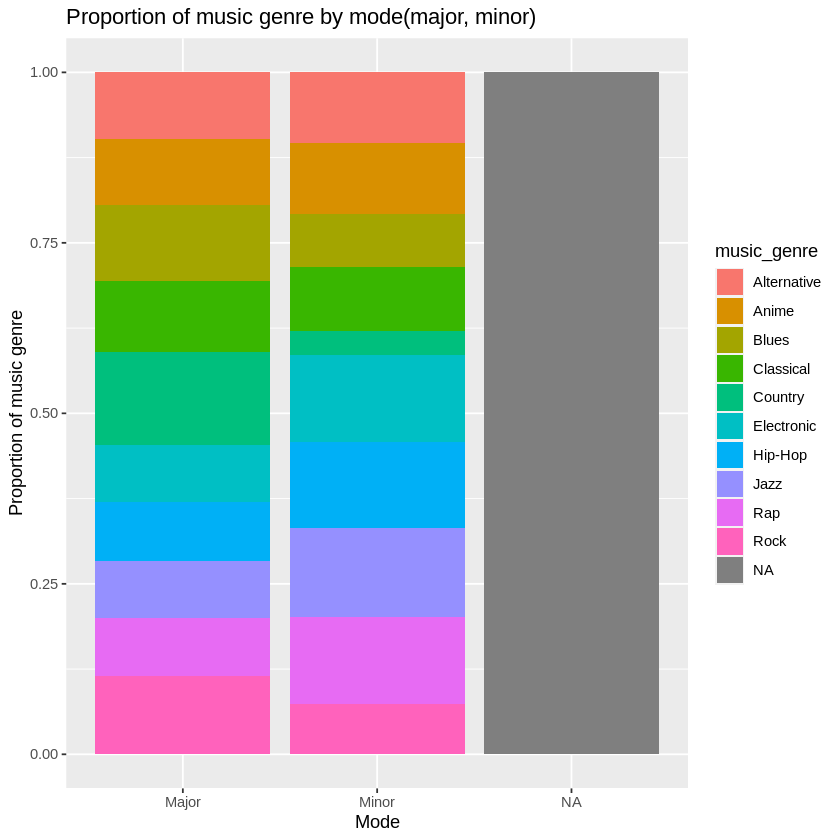

In [49]:
# proportion of music genre by mode(major, minor)
mode_proportion_plot <- data_train %>%
ggplot(aes(x = mode, fill = music_genre))+
geom_bar(position = "fill")+
labs(x = "Mode", y = "Proportion of music genre", fill = "music_genre") +
ggtitle("Proportion of music genre by mode(major, minor)")
mode_proportion_plot

## Methods

In this project, our group will use Spotify's dataset to predict the genre of a selected song. First after removing columns that we deem unrelated to genre prediction, a model will be trained on a large variety of factors such as popularity, acousticness, and dancability, with genre as the predictable factor. A new user attempting to predict the genre of a song would first find the song variables such as dancability, after which a k-nearest-neighbours analysis can be completed on the song (against our training data) to predict its genre.

We may be able to visualize this data if we find a correlation between any of the variables: say, tempo and danceability. Placing each song in a scatterplot would show a positive/negative relationship if there is one.

## Expected Outcomes & Significance

Provided a certain music track's statistics, our model should be able to produce a genre prediction, placing it into one of eleven different genres.

A model capable of categorizing song genre could be useful for anyone sorting and maintaining a song database, such as a studio or a music streaming platform such as Spotify or Soundcloud. Being able to automatically categorize songs uplodaded to such a database would allow not only better organization, but user experience improvements via 'genre' playlists. Furthermore, the model could be paired with information about genre preference from a user to curate custom song recommendations for them. For instance, someone who is known to be a rock fan could be recommended a rock song if the database contains knowledge of which song is in the rock genre.

Following questions may involve discovering correlation between variables. Does song tempo and danceability, have a correlative relationship, for instance? Discovering such correlations may help songwriters engineer their songs for a desired purpose. Another question may be to assess what other similar predictive models could be developed. One possibility is to simply predict a different variable in the dataset. Predicting dancability, for instance, may be a powerful way to categorize songs further and give highly personalized song recommendations.